In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1210441213097448666
 xla_global_id: -1]

In [6]:
(X_train, y_train), (X_test,y_test) = imdb.load_data()

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [7]:
print('첫번째 훈련용 리뷰 :',X_train[0])
print('첫번째 훈련용 리뷰의 레이블 :',y_train[0])

첫번째 훈련용 리뷰 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 훈련용 리뷰의 레이블 : 1


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


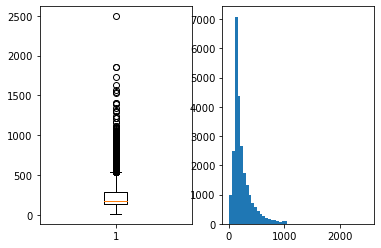

In [8]:
reviews_length = [len(review) for review in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length,bins=50)
plt.show()

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements,counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [6]:
word_to_index = imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items():
  index_to_word[value+3]=key

1654784/1641221 [==============================] - 1s 0us/step


In [7]:
print('빈도수 상위 1등 단어: {}'.format(index_to_word[4]))
print('빈도수 상위 3940등 단어 : {}'.format(index_to_word[3943]))

빈도수 상위 1등 단어: the
빈도수 상위 3940등 단어 : staged


In [8]:
for index, token in enumerate(("<pad>","<sos>","<unk>")):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in X_train[24999]]))

<sos> as a big fan of the original film it's hard to watch this show the garish set decor and harshly lighted sets rob any style from this remake the mood is never there instead it has the look and feel of so many television movies of the seventies crenna is not a bad choice as walter neff but his snappy wardrobe and swank apartment don't fit the mood of the original or make him an interesting character he does his best to make it work but samantha egger is a really bad choice the english accent and california looks can't hold a candle to barbara stanwick's velvet voice and sex appeal lee j cobb tries mightily to fashion barton keyes but even his performance is just gruff without style br br it feels like the tv movie it was and again reminds me of what a remarkable film the original still is


In [10]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU,SimpleRNN, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 10000
max_len = 500

(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [10]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.5026 - acc: 0.7645
Epoch 00001: val_acc improved from -inf to 0.79940, saving model to GRU_model.h5
313/313 [==============================] - 145s 459ms/step - loss: 0.5026 - acc: 0.7645 - val_loss: 0.5581 - val_acc: 0.7994
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.3212 - acc: 0.8742
Epoch 00002: val_acc improved from 0.79940 to 0.87620, saving model to GRU_model.h5
313/313 [==============================] - 148s 474ms/step - loss: 0.3212 - acc: 0.8742 - val_loss: 0.2980 - val_acc: 0.8762
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.2486 - acc: 0.9074
Epoch 00003: val_acc did not improve from 0.87620
313/313 [==============================] - 149s 477ms/step - loss: 0.2486 - acc: 0.9074 - val_loss: 0.3515 - val_acc: 0.8548
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.1970 - acc: 0.9262
Epoch 00004: val_acc improved from 0.87620 to 

In [ ]:
loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

152/782 [====>.........................] - ETA: 29s - loss: 0.3200 - acc: 0.8873

In [ ]:
good_num=0
bad_num=0
neutral_num=0

In [ ]:
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []

  global good_num, bad_num, neutral_num
  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=max_len)
  score = float(loaded_model.predict(pad_sequence)) # 예측

  if(score > 0.6):
   good_num=good_num+1
  elif(score<0.4)
    bad_num=bad_num+1
  else:
   neutral_num=neutral_num+1

In [16]:
import pandas as pd

train_set = pd.read_csv('../train.csv')
test_set = pd.read_csv('../test.csv')
game_ov = pd.read_csv('../game_overview.csv')

In [17]:
train_set.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [18]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


In [19]:
x = train_set["user_review"]
y = train_set["user_suggestion"]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


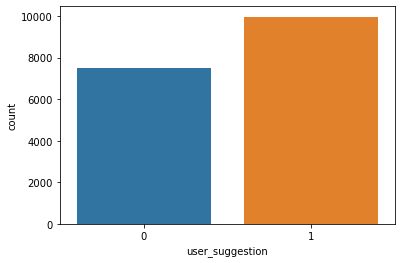

In [20]:
import seaborn as sns
sns.countplot(train_set["user_suggestion"])
plt.show()

In [21]:
good_num=0
bad_num=0
for input_data in x :
  sentiment_predict(input_data)
print(good_num)
print(bad_num)

InvalidArgumentError:  indices[0,499] = 10003 is not in [0, 10000)
	 [[node sequential/embedding/embedding_lookup
 (defined at C:\ProgramData\Anaconda3\lib\site-packages\keras\layers\embeddings.py:191)
]] [Op:__inference_predict_function_22822]

Errors may have originated from an input operation.
Input Source operations connected to node sequential/embedding/embedding_lookup:
In[0] sequential/embedding/embedding_lookup/22435:	
In[1] sequential/embedding/Cast (defined at C:\ProgramData\Anaconda3\lib\site-packages\keras\layers\embeddings.py:190)

Operation defined at: (most recent call last)
>>>   File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\82109\AppData\Local\Temp/ipykernel_3824/2725446012.py", line 4, in <module>
>>>     sentiment_predict(input_data)
>>> 
>>>   File "C:\Users\82109\AppData\Local\Temp/ipykernel_3824/2445295127.py", line 21, in sentiment_predict
>>>     score = float(loaded_model.predict(pad_sequence)) # 예측
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1789, in predict
>>>     tmp_batch_outputs = self.predict_function(iterator)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1621, in predict_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1611, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1604, in run_step
>>>     outputs = model.predict_step(data)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
>>>     return self(x, training=False)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 373, in call
>>>     return super(Sequential, self).call(inputs, training=training, mask=mask)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\layers\embeddings.py", line 191, in call
>>>     out = tf.nn.embedding_lookup(self.embeddings, inputs)
>>> 

In [ ]:
zero_num=0
one_num=0
for temp in y:
  if temp:
    one_num=one_num+1
  else:
    zero_num=zero_num+1
print(one_num)
print(zero_num)